##Install the dependencies 


In [0]:
!pip install tensorflow-gpu==2.0.0-rc0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 380.5MB 35kB/s 
     |████████████████████████████████| 4.3MB 46.4MB/s 
     |████████████████████████████████| 501kB 57.1MB/s 



# Subset of Kaggle Cat and Dog Dataset 

In [0]:

# Subset of Kaggle Cat and Dog Dataset 
!git clone https://github.com/ahatamiz/dog-cat-full-dataset.git
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'


datagen = ImageDataGenerator(rescale=1./255)
img_width = 32
img_height = 32
batch_size = 20

train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes = ['dogs', 'cats'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)


validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                                   target_size = (32, 32),
                                                   classes = ['dogs', 'cats'],
                                                   class_mode = 'binary',
                                                   batch_size = batch_size)

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 53.05 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

##Let's Build a VGG 16 CNN

First implement the first conv block 







![alt text](https://drive.google.com/uc?id=16CUeGt6EIDDGxeMRldoSxVF6IdM1Kujf)

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

##Let's talk about SGD with Momentum 

from tensorflow.keras.optimizers import SGD

What's the gradient descent with momentum ? 

In short we use an expotential 

![alt text](https://drive.google.com/uc?id=1CV9Q3HYgRxhyWvc0W5ED10ltc0yzcTcR)



In [0]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.6892 - accuracy: 0.5228 - val_loss: 0.6916 - val_accuracy: 0.5138
Epoch 2/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.6486 - accuracy: 0.6157 - val_loss: 0.5862 - val_accuracy: 0.6892
Epoch 3/5
1000/1000 [==============================] - 74s 74ms/step - loss: 0.5565 - accuracy: 0.7144 - val_loss: 0.5340 - val_accuracy: 0.7328
Epoch 4/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.5050 - accuracy: 0.7558 - val_loss: 0.5702 - val_accuracy: 0.7126
Epoch 5/5
1000/1000 [==============================] - 72s 72ms/step - loss: 0.4691 - accuracy: 0.7757 - val_loss: 0.5247 - val_accuracy: 0.7294


In [0]:
history.history

{'accuracy': [0.52285, 0.6157, 0.7144, 0.75575, 0.77565],
 'loss': [0.6891946232914925,
  0.6486167467236519,
  0.5565113095939159,
  0.5049949596822262,
  0.4690870726406574],
 'val_accuracy': [0.5138, 0.6892, 0.7328, 0.7126, 0.7294],
 'val_loss': [0.6915723826885224,
  0.5861812088489532,
  0.5340291213989258,
  0.570176112651825,
  0.5247432909011841]}

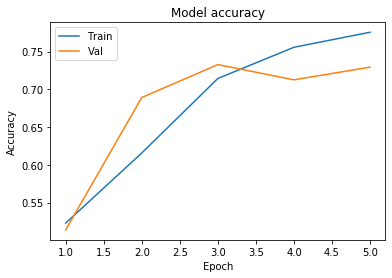

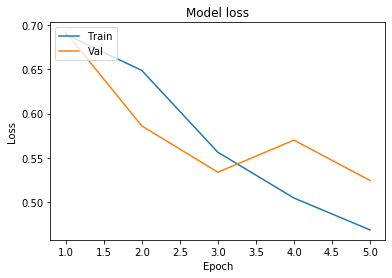

In [0]:
plot_learningCurve(history)




*   When the training accuracy is less than the validation accuracy, the model is *underfitting*

*   When the training accuracy is higher than the validation accuracy, the model is *overfitting*




##Let's Build a VGG 16 CNN




Now, add all the VGG16 Conv blocks 





In [0]:
![alt text](https://drive.google.com/uc?id=16CUeGt6EIDDGxeMRldoSxVF6IdM1Kujf)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[alt text](https://drive.google.com/uc?id=16CUeGt6EIDDGxeMRldoSxVF6IdM1Kujf)'


In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 87s 87ms/step - loss: 0.6688 - accuracy: 0.5808 - val_loss: 0.5729 - val_accuracy: 0.7114
Epoch 2/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.5620 - accuracy: 0.7150 - val_loss: 0.5231 - val_accuracy: 0.7392
Epoch 3/5
1000/1000 [==============================] - 86s 86ms/step - loss: 0.4898 - accuracy: 0.7678 - val_loss: 0.5021 - val_accuracy: 0.7616
Epoch 4/5
1000/1000 [==============================] - 86s 86ms/step - loss: 0.4415 - accuracy: 0.7942 - val_loss: 0.4630 - val_accuracy: 0.7808
Epoch 5/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.3959 - accuracy: 0.8206 - val_loss: 0.4537 - val_accuracy: 0.7874


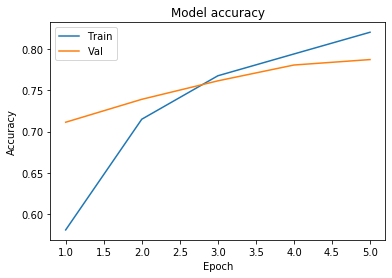

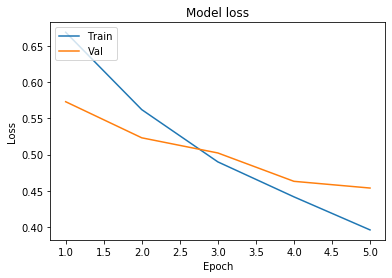

In [0]:
plot_learningCurve(history)


##Let's add a batch normalization layer


First, normalizing features to have mean zero and variance 1 can spead of learning since input features now take on a similar range of values.

Batch norm disseminates this idea by making the weights in later stages of a neural network to be less susceptible to changes. 

In simpler words, by making sure that the input to all layers have been normalized centered around zero, subsequent layers in a neural networks can be more effectively trained. As a result, it **speeds up training**.

![alt text](https://drive.google.com/uc?id=19LDIuTwbeeopHlEiC6zj8PfCJNLtJSV7)

In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 120s 120ms/step - loss: 0.5887 - accuracy: 0.6888 - val_loss: 0.5100 - val_accuracy: 0.7518
Epoch 2/5
1000/1000 [==============================] - 121s 121ms/step - loss: 0.4830 - accuracy: 0.7695 - val_loss: 0.5309 - val_accuracy: 0.7398
Epoch 3/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.4137 - accuracy: 0.8106 - val_loss: 0.5867 - val_accuracy: 0.7200
Epoch 4/5
1000/1000 [==============================] - 120s 120ms/step - loss: 0.3569 - accuracy: 0.8440 - val_loss: 0.4484 - val_accuracy: 0.8086
Epoch 5/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.3019 - accuracy: 0.8706 - val_loss: 0.5068 - val_accuracy: 0.7820


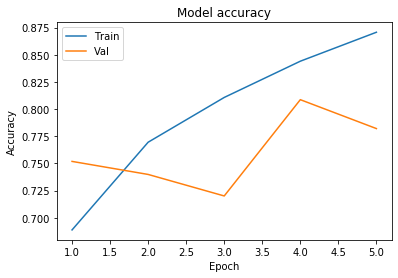

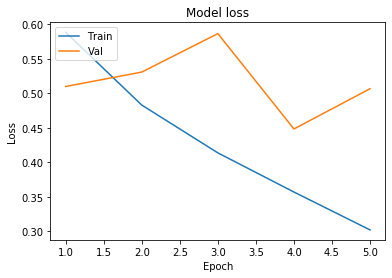

In [0]:
plot_learningCurve(history)

##Let's add a Dropout layer ( overfitting is an issue ! )


*   Dropout is a regularization technique that prevents overfitting.

> Indented block



*   In dropout, at every iteration, some nodes are randomly removed.

*   The intuition behind dropout is to not entirely rely on any one feature ( it can go away at random).






In [0]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu', padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 131s 131ms/step - loss: 0.6716 - accuracy: 0.6255 - val_loss: 0.6813 - val_accuracy: 0.6782
Epoch 2/5
1000/1000 [==============================] - 131s 131ms/step - loss: 0.5991 - accuracy: 0.6872 - val_loss: 1.1827 - val_accuracy: 0.5710
Epoch 3/5
1000/1000 [==============================] - 129s 129ms/step - loss: 0.5507 - accuracy: 0.7238 - val_loss: 0.8577 - val_accuracy: 0.6438
Epoch 4/5
1000/1000 [==============================] - 129s 129ms/step - loss: 0.5129 - accuracy: 0.7500 - val_loss: 0.7185 - val_accuracy: 0.6942
Epoch 5/5
1000/1000 [==============================] - 129s 129ms/step - loss: 0.4909 - accuracy: 0.7644 - val_loss: 0.4970 - val_accuracy: 0.7558


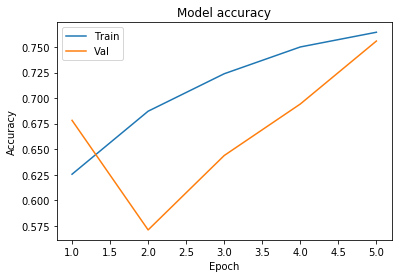

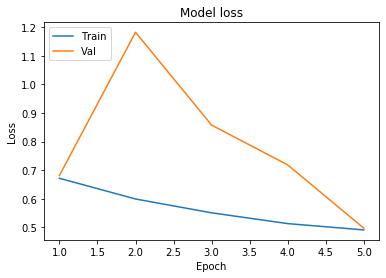

In [0]:
plot_learningCurve(history)

##Let's play with the learning-rate (an important hyper-parameter)


In [0]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 129s 129ms/step - loss: 0.4517 - accuracy: 0.7868 - val_loss: 0.4806 - val_accuracy: 0.7840
Epoch 2/5
1000/1000 [==============================] - 129s 129ms/step - loss: 0.4375 - accuracy: 0.7948 - val_loss: 0.4723 - val_accuracy: 0.7882
Epoch 3/5
1000/1000 [==============================] - 128s 128ms/step - loss: 0.4269 - accuracy: 0.8054 - val_loss: 0.4812 - val_accuracy: 0.7846
Epoch 4/5
1000/1000 [==============================] - 128s 128ms/step - loss: 0.4300 - accuracy: 0.8025 - val_loss: 0.4393 - val_accuracy: 0.8070
Epoch 5/5
1000/1000 [==============================] - 130s 130ms/step - loss: 0.4248 - accuracy: 0.8064 - val_loss: 0.4784 - val_accuracy: 0.7888


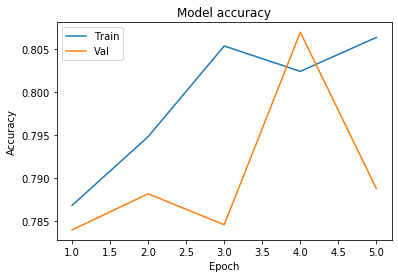

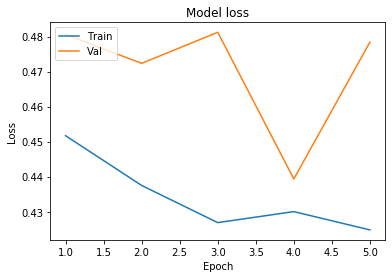

In [0]:
plot_learningCurve(history)